$\textbf{DS168L - PREDICTIVE ANALYTICS LABORATORY} \\ \texttt{2T SY2425}$

NAME: MA. ADDINE ANNE T. CARREON
 
SECTION: BM9 

### IMPORTING MODULES

In [1]:
import struct
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras import layers, models

### SAMPLE

In [2]:
def load_mnist_images(file_path):
    """Load MNIST images from the given file path."""
    with open(file_path, "rb") as f:
        _, num_images, rows, cols = struct.unpack(">IIII", f.read(16)) 
        images = np.fromfile(f, dtype=np.uint8).reshape(num_images, rows, cols)
    return images

In [3]:
def load_mnist_labels(file_path):
    """Load MNIST labels from the given file path."""
    with open(file_path, "rb") as f:
        _, num_labels = struct.unpack(">II", f.read(8))
        labels = np.fromfile(f, dtype=np.uint8)
    return labels

In [4]:
def visualize_mnist_samples(images, labels, num_samples=8):
    """Visualize a set of MNIST images with labels."""
    plt.figure(figsize=(10, 5))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(images[i], cmap="BuPu")
        plt.title(f"Label: {labels[i]}")
        plt.axis("off")
    plt.show()

In [5]:
# Load MNIST dataset
train_img = load_mnist_images("train-images.idx3-ubyte")
train_lbl = load_mnist_labels("train-labels.idx1-ubyte")
test_img = load_mnist_images("t10k-images.idx3-ubyte")
test_lbl = load_mnist_labels("t10k-labels.idx1-ubyte")

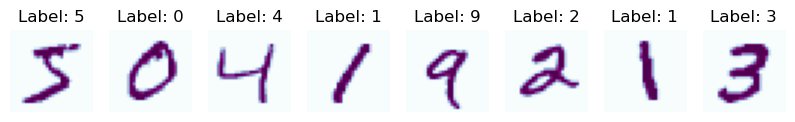

In [6]:
# Visualize
visualize_mnist_samples(train_img, train_lbl)

### FEATURE ENGINEERING

In [7]:
# Normalization & Reshaping
train_img, test_img = (np.expand_dims(img.astype("float32") / img.max(), axis=-1) for img in [train_img, test_img])

In [8]:
print("Train Images Shape:", train_img.shape)
print("Test Images Shape:", test_img.shape)

Train Images Shape: (60000, 28, 28, 1)
Test Images Shape: (10000, 28, 28, 1)


In [9]:
# One-hot encoding
train_lbl = tf.keras.utils.to_categorical(train_lbl, num_classes=10)
test_lbl = tf.keras.utils.to_categorical(test_lbl, num_classes=10)

In [10]:
print("Train Images Shape:", train_lbl.shape)
print("Test Images Shape:", test_lbl.shape)

Train Images Shape: (60000, 10)
Test Images Shape: (10000, 10)


In [11]:
# Building the model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(64, (3, 3), padding="same"),
    tf.keras.layers.LeakyReLU(negative_slope=0.1),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(128, (3, 3), padding="same"),
    tf.keras.layers.LeakyReLU(negative_slope=0.1),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(128, (3, 3), padding="same"),
    tf.keras.layers.LeakyReLU(negative_slope=0.1),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128),
    tf.keras.layers.LeakyReLU(negative_slope=0.1),
    
    tf.keras.layers.Dense(10, activation='softmax')
])

**Why?**
* Three convolutional layers is used to extract hierarchical spatial features.
* The first layer has 64 filters to capture basic patterns, while the next layers have 128 filters for more complex feature extraction.
* LeakyReLU is used instead of ReLU to prevent dead neurons and ensure gradients flow for all inputs. Since MNIST is a relatively simple dataset, LeakyReLU provides a good balance between performance and computational efficiency.
* MaxPooling is applied to reduce spatial dimensions and computation.
* Softmax is used in the output layer to ensure the model outputs probabilities for multi-class classification.

In [12]:
# Model Compilation
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

**Why?**
* `categorical_crossentropy` is chosen as the loss function since this is a multi-class classification problem.
* `rmsprop` optimizer is used since it adapts learning rates and works well for deep networks with non-stationary objectives.

In [13]:
# EarlyStopping prevents overfitting by stopping training when validation loss stops improving.
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# ModelCheckpoint ensures we save the best model weights.
checkpoint = tf.keras.callbacks.ModelCheckpoint("best_model.keras", save_best_only=True, monitor='val_loss')

### TRAINING AND TESTING

In [14]:
history = model.fit(train_img, train_lbl, 
                    epochs=21, batch_size=64, validation_split=0.2, 
                    callbacks=[early_stopping, checkpoint])

Epoch 1/21
750/750 ━━━━━━━━━━━━━━━━━━━━ 32s 40ms/step - accuracy: 0.8846 - loss: 0.3490 - val_accuracy: 0.9858 - val_loss: 0.0480
Epoch 2/21
750/750 ━━━━━━━━━━━━━━━━━━━━ 28s 37ms/step - accuracy: 0.9869 - loss: 0.0405 - val_accuracy: 0.9907 - val_loss: 0.0344
Epoch 3/21
750/750 ━━━━━━━━━━━━━━━━━━━━ 28s 37ms/step - accuracy: 0.9927 - loss: 0.0244 - val_accuracy: 0.9915 - val_loss: 0.0319
Epoch 4/21
750/750 ━━━━━━━━━━━━━━━━━━━━ 28s 37ms/step - accuracy: 0.9942 - loss: 0.0181 - val_accuracy: 0.9902 - val_loss: 0.0418
Epoch 5/21
750/750 ━━━━━━━━━━━━━━━━━━━━ 28s 37ms/step - accuracy: 0.9968 - loss: 0.0105 - val_accuracy: 0.9897 - val_loss: 0.0418
Epoch 6/21
750/750 ━━━━━━━━━━━━━━━━━━━━ 28s 37ms/step - accuracy: 0.9967 - loss: 0.0102 - val_accuracy: 0.9908 - val_loss: 0.0436
Epoch 7/21
750/750 ━━━━━━━━━━━━━━━━━━━━ 28s 37ms/step - accuracy: 0.9975 - loss: 0.0074 - val_accuracy: 0.9902 - val_loss: 0.0552
Epoch 8/21
750/750 ━━━━━━━━━━━━━━━━━━━━ 28s 37ms/step - accuracy: 0.9976 - loss: 0.0078 - 

In [15]:
# Evaluating on test set
test_loss, test_accuracy = model.evaluate(test_img, test_lbl)
print(f"\033[1mTest Accuracy\033[0m: {test_accuracy:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9880 - loss: 0.0384
Test Accuracy: 0.99


### PREDICTION

In [16]:
predictions = model.predict(test_img)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [17]:
def visualize_predictions(images, labels, predictions, num_samples=9):
    """Visualize a set of MNIST images with their true and predicted labels."""
    plt.figure(figsize=(12, 10))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap="BuPu")
        true_label = np.argmax(labels[i])
        predicted_label = np.argmax(predictions[i])
        plt.title(f"True: {true_label}\nPredicted: {predicted_label}")
        plt.axis("off")
    plt.show()

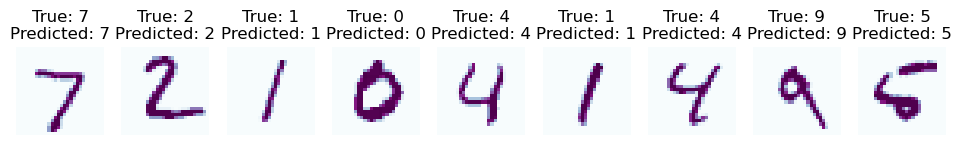

In [18]:
# Call the function to visualize predictions
visualize_predictions(test_img, test_lbl, predictions, num_samples=9)

The CNN model successfully recognized handwritten digits from the MNIST dataset with **99% accuracy**. It used **three convolutional layers** to detect patterns, **LeakyReLU** to keep learning efficient, and **MaxPooling** to simplify the data. The final layer used **Softmax** to classify the digits. The model was trained using **categorical cross-entropy loss** and the **RMSprop optimizer**, with **early stopping** to prevent overfitting. Predictions were highly accurate, as seen in the visualizations. This shows that CNNs work well for digit recognition, and adding *data augmentation* or *dropout layers* could make the model even better.

***
***